# Exploratory data analysis (EDA) on the SGIJ MySQL Dataset

Make a EDA Study for all players activate during a year selected

In [24]:
import math
from datetime import date
from datetime import datetime
from collections import Counter, OrderedDict
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.plotting import register_matplotlib_converters
import matplotlib
import matplotlib.pyplot as plt
import mysql.connector
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import linregress
from scipy import stats
from scipy.spatial.distance import cdist
from IPython.display import display, Markdown
from tabulate import tabulate
%matplotlib inline

register_matplotlib_converters()

Connect to MySQL databasef from credentials

NoteNook Year EDA Study

In [2]:
YEAR = 2015

MySQL Database connection string

In [3]:
config = {
  'user': 'root',
  'password': 'thingtrack',
  'host': '127.0.0.1',
  'database': 'gaming',
  'raise_on_warnings': True,
  'charset': 'utf8'
}

try:
  cnx = mysql.connector.connect(**config)
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)

## Sex player bar chart distribution

Get raw Dataset

In [4]:
cursor = cnx.cursor()

query = ('SELECT pl.sex, COUNT(pl.sex) as total'
        ' FROM player pl'
        ' WHERE YEAR(pl.activation_date) = %s'
        ' GROUP BY pl.sex' 
        ' ORDER BY pl.sex') %YEAR

cursor.execute(query)

# return a list of tuples
result_sex = list(cursor.fetchall())

Plot sex distribution Dataset

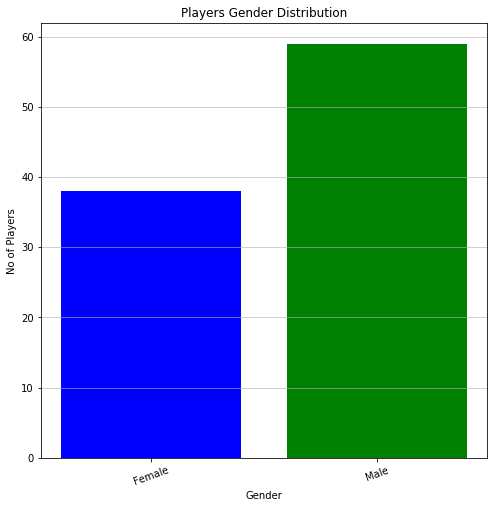

Female Dataset Size: 38
Male Dataset Size: 59
------------------------
Dataset Size: 97


In [5]:
data = np.array(result_sex) # numpy convert to string all values
labels = data[:, 0]
values = data[:, 1].astype(int)
    
plt.figure(figsize=(8, 8))  
plt.bar(labels, values, color=('blue', 'green'))
plt.title('Players Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('No of Players')
plt.xticks(np.arange(labels.size), ('Female', 'Male'), rotation=20)
plt.grid(axis='y', alpha=0.75)
plt.show()

print('Female Dataset Size: ' + str(values[0]))
print('Male Dataset Size: ' + str(values[1]))
print('------------------------')
print('Dataset Size: ' + str(sum(values)))

## Deposit player histogram distribution

Get raw Dataset

In [6]:
cursor = cnx.cursor()

query = ('SELECT player_id, DATE(checkin_time) AS checkin_time, SUM(deposit) tot_deposit,'
         ' CASE'
         '    WHEN SUM(deposit)<200 THEN "VERY LOW"'
         '    WHEN SUM(deposit)>=200 AND SUM(deposit)<500 THEN "LOW"'
         '    WHEN SUM(deposit)>=500 AND SUM(deposit)<700 THEN "HIGH"'
         '    WHEN SUM(deposit)>=700 THEN "VERY HIGH"'
         ' END as deposit_level'
         ' FROM gaming.account'
         ' WHERE YEAR(checkin_time) = %s'
         ' GROUP BY player_id, DATE(checkin_time)') %YEAR

cursor.execute(query)

# return a list of tuples
result_deposit = list(cursor.fetchall())

Plot deposit distribution Dataset

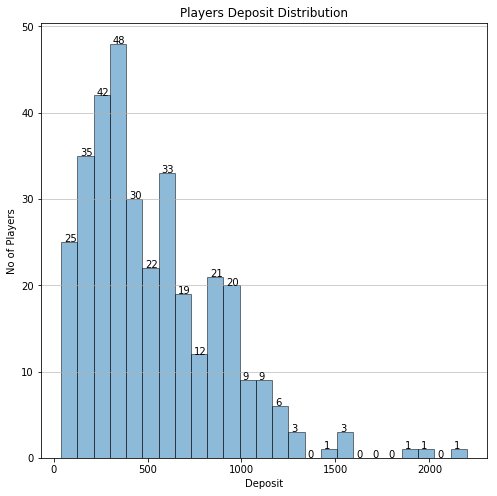

    player_id checkin_time tot_deposit deposit_level
0           1   2015-09-17         560          HIGH
1           1   2015-09-20         330           LOW
2           1   2015-09-22         950     VERY HIGH
3           1   2015-09-23         310           LOW
4           2   2015-11-01         760     VERY HIGH
5           2   2015-11-04         650          HIGH
6           2   2015-11-05        1120     VERY HIGH
7           3   2015-03-17        1090     VERY HIGH
8           3   2015-03-23         730     VERY HIGH
9           4   2015-07-12         840     VERY HIGH
10          4   2015-07-15         330           LOW
11          4   2015-07-17         590          HIGH
12          4   2015-07-18         570          HIGH
13          4   2015-07-19        1240     VERY HIGH
14          6   2015-11-19         850     VERY HIGH
15          8   2015-05-01         790     VERY HIGH
16          8   2015-05-05         530          HIGH
17          8   2015-05-06         390        

In [50]:
data = np.array(result_deposit) # numpy convert to string all values
values = data[:, 2].astype(int) # get deposit array from dataset
bins = 25

plt.figure(figsize=(8, 8))  
arr = plt.hist(values, bins, alpha=0.5, histtype='bar', ec='black')
plt.title('Players Deposit Distribution')
plt.xlabel('Deposit')
plt.ylabel('No of Players')
plt.grid(axis='y', alpha=0.75)
for i in range(bins):
    plt.text(arr[1][i] + 15, arr[0][i], str(int(arr[0][i])))
    
plt.show()

#print(tabulate(data, headers=["player_id","checkin_time", "tot_deposit", "deposit_level"]))

dataset = pd.DataFrame({'player_id': data[:, 0], 
                        'checkin_time': data[:, 1],
                        'tot_deposit': data[:, 2],
                        'deposit_level': data[:, 3]})
dataset = dataset.reindex(columns=['player_id', 'checkin_time', 'tot_deposit', 'deposit_level'])
print(dataset)